In [1]:
import numpy as np

# 5a

This is done simply by doing the cumulative product of the constant retention rate

In [2]:
#changed to avg retention rate for cohort 0 only

constant_retention_rate = 0.17872549697892165

# retention_rates = [retention_rate]*12
active_probs_constant_retention = [constant_retention_rate**i for i in range(12)]

# survival_probability_const_retention_rate = np.cumprod(retention_rates)
print(active_probs_constant_retention)


[1.0, 0.17872549697892165, 0.03194280327036253, 0.005708993389395467, 0.0010203426807690833, 0.0001823612527092596, 3.259260552016115e-05, 5.8251296194287455e-06, 1.0410991861990393e-06, 1.8607096945777418e-07, 3.325562648969044e-08, 5.943628371715317e-09]


# 5b

Using almost the same as in the previous task. Getting the same averages for each month after acquisition, and then doing the cumulative product across the retention rates to get the active probabilities

In [3]:
from main import get_all_retention_rates_for_cohort, get_data

data = get_data()

retention_rates_cohort0 = np.array(get_all_retention_rates_for_cohort(data,0))

active_probs_changing_retention_cohort0 = retention_rates_cohort0
active_probs_changing_retention_cohort0[0] = 1
#active_probs_changing_retention_cohort0 = active_probs_changing_retention_cohort0[~np.isnan(active_probs_changing_retention_cohort0)]
active_probs_changing_retention_cohort0 = np.cumprod(active_probs_changing_retention_cohort0)
print(active_probs_changing_retention_cohort0)

[1.00000000e+00 4.60858586e-01 3.40909091e-02 1.01010101e-02
 6.31313131e-04 0.00000000e+00            nan            nan
            nan            nan            nan            nan]


# 5c

In [9]:
#Calculating expected lifetime of cohort 0 using avg retention rate form cohort 0


constant_retention_rate = 0.17872549697892165

active_probs_constant_retention = [(constant_retention_rate)**i for i in range(1000)]
#E[lifetime] = 1*retention_rate + 2*retention_rate^2 +..n*retention_rate^3
# print(active_probs_constant_retention)
# print(nsum(lambda n: n*active_probs_constant_retention[n-1], [1, 100]))
#Think this is an error in the task, as this is not calculated in 4, but it corresponds to the active probabilities we are asked to use
constant_rates_cohort_0_expected_lifetime  = sum([i*active_probs_constant_retention[i-1]*(1-constant_retention_rate) for i in range(1,len(active_probs_constant_retention))])
print(constant_rates_cohort_0_expected_lifetime)

1.2176204287485055


[1.00000000e+00 4.60858586e-01 3.40909091e-02 1.01010101e-02
 6.31313131e-04 0.00000000e+00            nan            nan
            nan            nan            nan            nan]
[1.0, 0.178726, 0.031942983076, 0.005709041593241176, 0.0010203541677936223, 0.00018236381899308293, 3.259315591335774e-05, 5.825244383770776e-06, 1.0411226277338157e-06, 1.8607568276435392e-07, 3.325656247774192e-08, 5.943812385396902e-09, 1.0623138123924467e-09, 1.8986309843365243e-10, 3.393347213065296e-11, 6.064793740023081e-12, 1.0839363259793651e-12, 1.9372760379698802e-13, 3.4624159716220476e-14, 6.188237569441221e-15, 1.1059989478359516e-15, 1.976707679509283e-16, 3.532890567279761e-17, 6.3141939952764254e-18, 1.1285106359997744e-18, 2.0169419192969566e-19, 3.604799614682679e-20, 6.4427141593377646e-21, 1.1514805308418013e-21, 2.0579950935523176e-22, 3.6781723109023153e-23, 6.573850244383272e-24, 1.1749179587776446e-24, 2.099883871004933e-25, 3.7530384472922765e-26, 6.707655495307594e-27, 1.198832

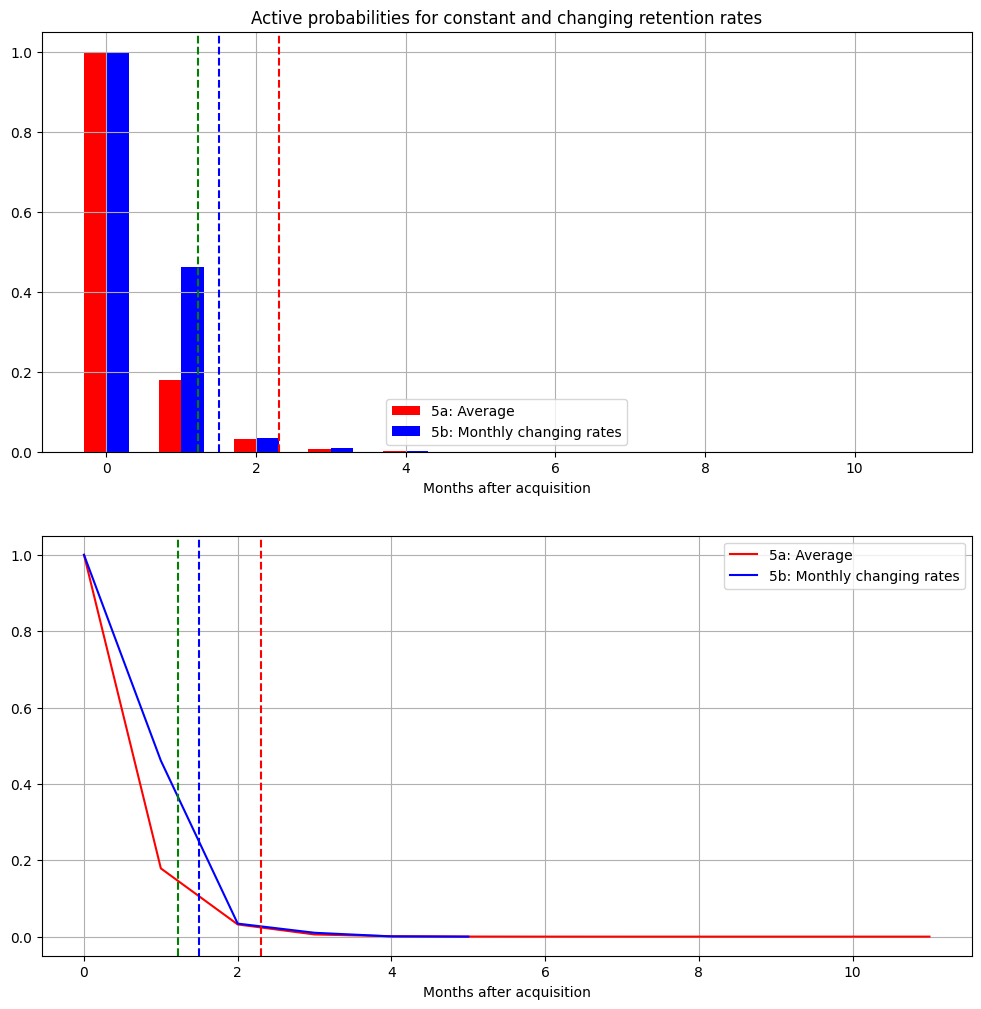

In [11]:
import matplotlib.pyplot as plt

# RUN ALL CELLS ABOVE BEFORE RUNNING THIS CELL
constant_rates_expected_lifetime = 2.300437982687964
changing_rates_expected_lifetime = 1.5056818182033227


t_const = np.arange(0,len(active_probs_constant_retention[:12]),1)
t_changing = np.arange(0,len(active_probs_changing_retention_cohort0),1)
bar_width = 0.3
print(active_probs_changing_retention_cohort0)
print(active_probs_constant_retention)

fig, axs = plt.subplots(2, 1, figsize=(12,12))

axs[0].bar(t_const-bar_width/2, active_probs_constant_retention[:12], bar_width, color='r', label="5a: Average")
axs[0].bar(t_changing+bar_width/2, active_probs_changing_retention_cohort0, bar_width, color='b', label="5b: Monthly changing rates")
axs[0].axvline(x=constant_rates_expected_lifetime, color='r', linestyle='--')
axs[0].axvline(x=changing_rates_expected_lifetime, color='b', linestyle='--')
axs[0].axvline(x=constant_rates_cohort_0_expected_lifetime, color='g', linestyle='--')
axs[0].legend()
axs[0].grid()

axs[0].set_title("Active probabilities for constant and changing retention rates")
axs[0].set_xlabel("Months after acquisition")

axs[1].plot(t_const, active_probs_constant_retention[:12], color='r', label="5a: Average")
axs[1].plot(t_changing, active_probs_changing_retention_cohort0, color='b', label="5b: Monthly changing rates")
axs[1].axvline(x=constant_rates_expected_lifetime, color='r', linestyle='--')
axs[1].axvline(x=changing_rates_expected_lifetime, color='b', linestyle='--')
axs[1].axvline(x=constant_rates_cohort_0_expected_lifetime, color='g', linestyle='--')
axs[1].legend()
axs[1].grid()

axs[1].set_xlabel("Months after acquisition")

plt.show()


We've set the first survival probability to $1$ since all customers stay at least for the first month. The bars and lines show the active probabilities for each month for the constant retention rate and for the changing retention rates. The x-axes show the expected month lifetime for each type of calculation.
The two methods are rather similar for months between 2 and 5. other than those, the more realistic survival probability from changing monthly rates is higher for month 1.

# 5d

*New*:
The active probabilites for using the average retention rate for cohort 0 are smaller than the active probabilites calculated using the changing retention rates. Hence, the expected customer lifetime is shorter. This means that using the average retention rates will likely underestimate the customer lifetime value of a typical cohort 0 customer. Meanwhile, we see that the expected lifetime when using the constant retention rate averaged across all cohorts (red line) is larger than both of expected lifetimes calculated specifically for cohort 0, and the same goes for the survival probabilities. Using this retention rate, we are therefore likely to overestimate the CLV of a typical customer from cohort 0.